In [1]:
import os
import sys
sys.path.append('../utils/')

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pickle

from data_gen import get_shape_coords, four_plus_poly_points, draw_stripes, generate_illusion_set
from save_data import save_dataset

In [2]:
white = (255,255,255)
black = (0, 0, 0)
red = (255,0,0)
green = (0,255,0)
blue = (0, 255, 255)
gray = (165, 165, 165)

IM_DIM = 512
CHANNELS = 3
bar_width = IM_DIM//32

In [35]:
ims = generate_illusion_set(
    base_color=black,
    shape='square',
    shape_color=blue,
    shape_size='small',
    shape_or='vertical',
    stripe_or='horizontal'
    )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


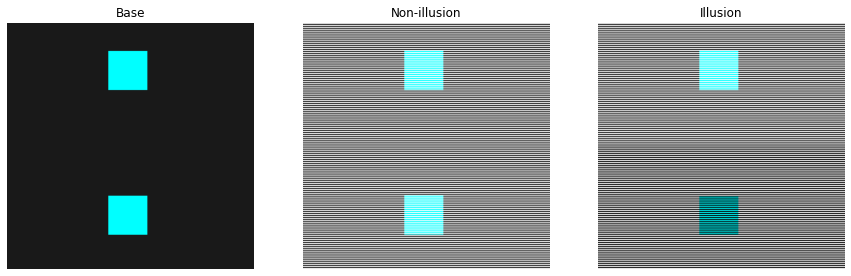

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
labels = ['Base','Non-illusion','Illusion']
for i, ax in enumerate(axs):
    ax.axis('off')
    ax.imshow(ims[i])
    ax.set_title(labels[i])

# Generating dataset

In [177]:
label_dict = {
    'square': 0,
    'triangle': 1,
    'circle': 2,
    'pentagon': 3
}
with open ('/Users/markpenrod/Desktop/illu_data/label_dict.p', 'wb') as f:
    pickle.dump(label_dict, f)

In [71]:
# randomly flip half the images (so the illusions aren't always on the same side)
def flip_im(im, orientation):
    if orientation == 'horizontal':
        return np.hstack((im[:,IM_DIM//2:,:], im[:,:IM_DIM//2+1,:]))
    elif orientation == 'vertical':
        return np.vstack((im[IM_DIM//2:,:,:], im[:IM_DIM//2,:,:]))
    return

In [53]:
# Generate data set
base_colors = [white, black] # determines whether illusion makes object lighter or darker, respectively
shapes = ['circle', 'square', 'triangle', 'pentagon']
colors = [blue, red, green, gray]
shape_sizes = ['small', 'normal', 'large']
shape_ors = ['vertical', 'horizontal', 'diagonal']
stripe_ors = ['vertical', 'horizontal', 'diagonal']
n_image_sets = len(base_colors) * len(shapes) * len(colors) * len(shape_sizes) * len(shape_ors) * len(stripe_ors)
print(f'Number of image sets: {n_image_sets}')

Number of image sets: 864


In [33]:
data_path = '/Users/markpenrod/Desktop/illu_data'
os.mkdir(data_path)
bases_path = data_path + '/bases'
non_illus_path = data_path + '/non_illu'
illus_path = data_path + '/illu'

paths = [bases_path, non_illus_path, illus_path]
for path in paths:
    os.mkdir(path)
headers = ['base', 'nonillu', 'illu']

In [ ]:
save_dataset(data_path)

**Test load data**

In [172]:
random_ind = int(np.random.uniform(0, n_image_sets))

In [173]:
test_ims = []
for path in paths:
    im_path = path + '/' + sorted(os.listdir(path), key=lambda x: int(x.split('_')[1]))[random_ind]
    with open(im_path, 'rb') as f:
        im = pickle.load(f)
        test_ims.append(im)

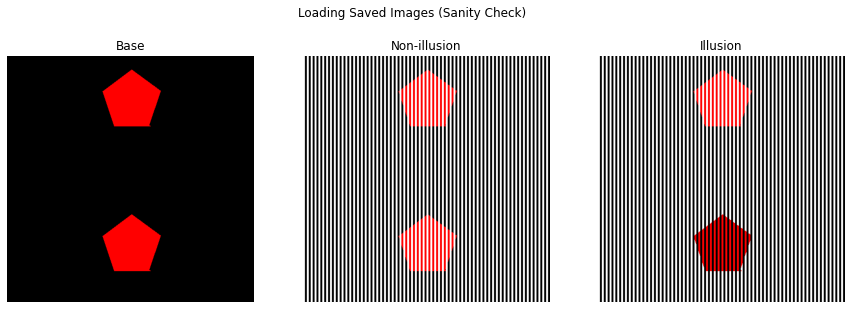

In [174]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
labels = ['Base','Non-illusion','Illusion']
fig.suptitle('Loading Saved Images (Sanity Check)')
for i, ax in enumerate(axs):
    ax.axis('off')
    ax.imshow(test_ims[i])
    ax.set_title(labels[i])